# Using Eigenvectors of Bigram Graph to Derive Parts of Speech for English and Mandarin

Youyun Zhang

1 Introduction

This project explores the possibility of using statistical methods to derive parts of speech automatically from English texts and Mandarin texts. 

The idea mainly comes from John Goldsmith and Mikhail Belkin's paper *Using eigenvectors of the bigram graph to infer morpheme identity* in 2002, where they talked about constructing a graph in which vertices represent words, and edges represent pairs of words that have similar distribution in the text; and representing the similarity of syntactic behavior of words in statistical methods. This project will implement a similar method, but instead of using laplacian matrix of only high frequency words in the corpus, here I use the covariance matrix to obtain the projection of nearest-neighbor graph and examine if the eigenvectors preserve the notion of locality of graph.

The project bases on the assumption that the parts of speech of a word is largely influenced by the set of words that show up before this word and after this word. Thus bigram is used to summerize the behavior of any pairs of words in the text.

2 Constructing Bigram Graph and Derive Eigenvectors

First step is to read in a random text. Below I use the first 18 chapters of Pride and Prejudice. Then I take out the punctuations, tokenize the text into a list, and find the set of words used in the text.

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import string
import scipy.sparse.linalg as la
from scipy.sparse import csgraph
%matplotlib inline

filename = 'Austen5.txt'
austentext = open(filename, 'r')
austentext = austentext.read()
austentext = austentext.lower()
s = ''.join(ch for ch in austentext if ch not in set(string.punctuation))
austentext=s
text = austentext.split()
Words = sorted(list(set(text)))

Now we create the bigram of the frequency that every word shows up together with its right neighbors.

Then we derive its coveriance matrix that represents the relation between the i_th and j_th element in the Words list.

We take its first eigenvector and second eigenvector and check if these top two eigenvectors preserve some sort of locality of how close two words are of their functions. Since the numpy algorithm finds eigenvectors regardless their directions, for further examining purposes, I fixed the direction of eigenvectors by fixing the value of their first entries both positive.

In [2]:
BGM = np.zeros((len(Words),len(Words)))
for n in range(len(text)-1):
    BGM[Words.index(text[n])][Words.index(text[n+1])] =  BGM[Words.index(text[n])][Words.index(text[n+1])] + 1

BGM_cov = np.cov(BGM.T)
Evals, Evecs = la.eigs(BGM_cov, k=5)
E1 = Evecs[:,1]
E2 = Evecs[:,2]

while E1[0]<0 or E2[0]<0:
    Evals, Evecs = la.eigs(BGM_cov, k=5)
    E1 = Evecs[:,1]
    E2 = Evecs[:,2]

3 Examine the 2-dimention projections of 1st and 2nd eigenvectors

To examine, plot the two eigenvectors onto two orthogonal axises. For later locating the words represented on the graph, here I sort the eigenvectors and obtain two list of indices of the values of the entries in the eigenvectors in ascending order.

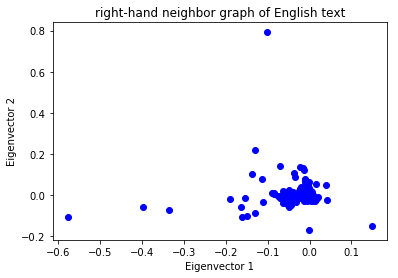

In [3]:
plt.clf()
fig, myAx = plt.subplots()
myAx.plot(np.real(E1),np.real(E2),'bo')
plt.title("right-hand neighbor graph of English text")
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')

E1_sorted=np.argsort(E1)
E2_sorted=np.argsort(E2)  

Locate the words on the most left in the graph and examine their similaries.

0 was
1 had
2 is
3 could
4 to
5 i
6 would
7 he
8 am
9 have
10 she
11 not
12 and
13 be
14 should
15 must
16 will
17 did
18 has
19 were
20 do
21 in
22 can
23 you
24 may


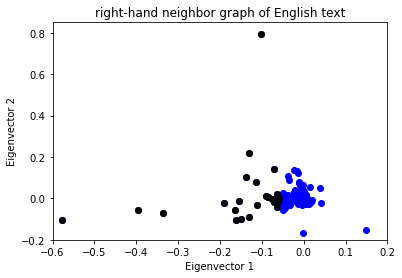

In [4]:
v1=[]
v2=[]
for i in range(25):
    v1.append(E1[E1_sorted[i]])
    v2.append(E2[E1_sorted[i]])
    print (i, Words[E1_sorted[i]])
myAx.plot(np.real(v1),np.real(v2),'ko')
myAx.axis([-.6, .2, -.2, .85])
fig

Notice that these words are all from closed class, including auxiliary verbs, pronouns, negations, conjunctions and some propostions. And note that the auxiliaries, pronouns and negation 'not' all take a verb after them in Englist. Therefore naturally there are some silmiarities between these categories.

Locate the auxiliaries (non-mondal) in yellow dots: 'was', 'had'('have' also have other functions but we count it in for now), 'is', 'am', 'be', 'did', 'has','were','do'. 

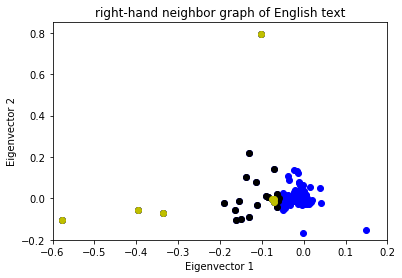

In [5]:
Aux=[0,1,2,13,17,18,19]
for i in Aux:
    myAx.plot(np.real(v1[i]),np.real(v2[i]),'yo')#yellow dots
myAx.axis([-.6, .2, -.2, .85])
fig    

The auxiliaries seem to follow a trend line except for the word on the top.
Locate the word on the very top.

In [6]:
print (Words[E2_sorted[-1]])

be


It's interesting that 'be' don't follow the trend line of other auxiliary verbs. This is not a phenomoenon that is expected in a right-hand neighbor graph. Because the words to the right of 'be' and 'is' are usually of same categories such as adjectives, verbs. It is indeed expected in a left-hand neighbor graph because the words before 'is', 'are' are usually nouns, while the left neighbor of 'be' is rarely a noun. 

Locate the models in magenta dots: 'could','would','should','must','will','can','may'. Zoom in.

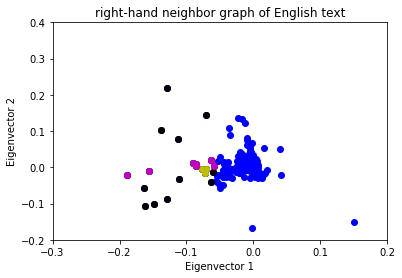

In [7]:
Mod=[3,6,14,15,16,22,24]
for i in Mod:
    myAx.plot(np.real(v1[i]),np.real(v2[i]),'mo')
myAx.axis([-.3, .2, -.2, .4])
fig    

Locate the pronouns in cyan: 'i', 'he', 'she','you'.

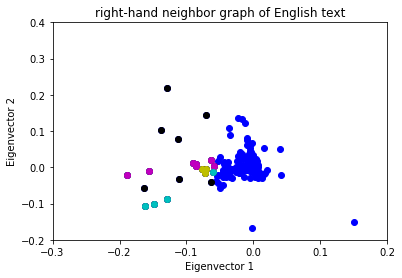

In [8]:
pron=[5,7,10,23]
for i in pron:
    myAx.plot(np.real(v1[i]),np.real(v2[i]),'co')
myAx.axis([-.3, .2, -.2, .4])
fig   

In [9]:
UGM = np.zeros((len(Words)))
for n in range(len(text)-1):
    UGM[Words.index(text[n])]=UGM[Words.index(text[n])]+1
print("i, word, frequency in text")
print("===")
for i in Aux:
    print(i, Words[E1_sorted[i]],UGM[E1_sorted[i]])
print("===")
for i in pron:
    print(i, Words[E1_sorted[i]],UGM[E1_sorted[i]])
print("===")
for i in Mod:
    print(i, Words[E1_sorted[i]],UGM[E1_sorted[i]])

i, word, frequency in text
===
0 was 442.0
1 had 274.0
2 is 269.0
13 be 295.0
17 did 56.0
18 has 58.0
19 were 141.0
===
5 i 458.0
7 he 398.0
10 she 349.0
23 you 301.0
===
3 could 113.0
6 would 107.0
14 should 70.0
15 must 68.0
16 will 82.0
22 can 67.0
24 may 51.0


While the last few elements in Auxiliary are clustered together and don't follow a trend line. Our assumption is certainly true that words that have higher frequency tend to have lower value 1st and 2nd eigenvetors, thus furthur from all the other words, than those words with lower frequency.

Now we examine the words that are distributed on the top of the graph.

4 say
5 see
6 make
7 think
9 know
10 hear
12 give
13 me
14 go
15 dance
16 find
18 speak
20 get
21 join
22 wish
23 assure
24 like
25 introduce


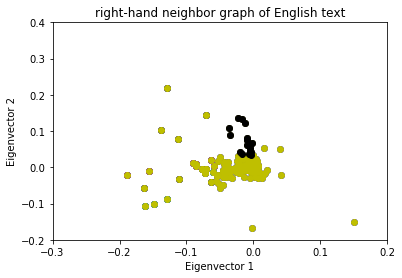

In [10]:
myAx.plot(np.real(E1),np.real(E2),'yo')
v1_v=[]
v2_v=[]
v3=[]
v4=[]
for i in range(1,26):
    if E1[E2_sorted[-i]]>-.05 and E1[E2_sorted[-i]]<.015:
        v1_v.append(E1[E2_sorted[-i]])
        v2_v.append(E2[E2_sorted[-i]])
        print (i, Words[E2_sorted[-i]])
myAx.plot(np.real(v1_v),np.real(v2_v),'ko')
fig

These are almost exclusively verbs. And most of them are transitive.

Now we examine the words that are distributed on the right corner of the graph.

1 the
2 his
4 them
5 this
6 such
8 your
9 being
10 general
11 which
12 town
13 spite
14 an
15 their
16 whom
17 love
18 seeing
19 its
===
20 a
21 the
28 that
30 it
31 they
32 in
33 of
35 very
36 all
37 being
38 an
39 no
40 some
41 though
42 when
43 if
44 as
45 general
46 his
47 with
49 such


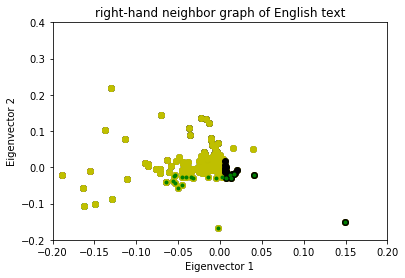

In [11]:
myAx.plot(np.real(E1),np.real(E2),'yo')
v1=[]
v2=[]
v3=[]
v4=[]
for i in range(1,20):
    if E2[E1_sorted[-i]]<.03:
        v1.append(E1[E1_sorted[-i]])
        v2.append(E2[E1_sorted[-i]])
        print (i, Words[E1_sorted[-i]])
myAx.plot(np.real(v1),np.real(v2),'ko')
print("===")
for i in range(0,30):
    if E1[E2_sorted[i]]>-.1:
        v3.append(E1[E2_sorted[i]])
        v4.append(E2[E2_sorted[i]])
        print (i+20, Words[E2_sorted[i]])
myAx.plot(np.real(v3),np.real(v4),'g.')
myAx.axis([-.2, .2, -.2, .4])
fig

Notice that the word on the most right is 'the', a determiner. And the words in the mid bottom is 'a'. Words like 'his', 'her', 'this', 'your','their' also behaves somewhat similar to a determiner, in that they all appear before NP.

These results show that the words of same parts of speech or at least have similar functions are indeed close each other or have relation with each other in statistical model. The eigenvectors preserves the locality of the graph.


Now we want to know what kind of words appear after a same category and where the most frequent neighbors of words in this category locate.

Take the words on the graph where most of them are verbs, sum up their representitive columns in the bigram into an array, and then pick out the entries in the array that have the largest value. These will be the most frequenct words that occur after the verbs. Zoom in.

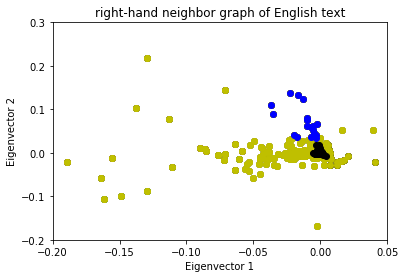

In [12]:
myAx.plot(np.real(E1),np.real(E2),'yo')
myAx.plot(np.real(v1_v),np.real(v2_v),'bo')
v1=[]
v2=[]
M_v=np.zeros(len(Words))
for i in range(1,26):
    
    if E1[E2_sorted[-i]]>-.05 and E1[E2_sorted[-i]]<.015:
        
        for xp in range(len(Words)):
            M_v[xp]= M_v[xp]+BGM[E2_sorted[-i]][xp]

        
M_v_sorted=np.argsort(M_v)  
for x in range(250):

    v1.append(E1[M_v_sorted[x]])
    v2.append(E2[M_v_sorted[x]])
myAx.plot(np.real(v1),np.real(v2),'ko')
myAx.axis([-.2, .05, -.2, .3])
fig

Do this again to the words that was left most on the graph, i.e., the function words.

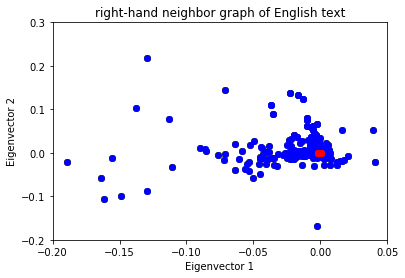

In [13]:
myAx.plot(np.real(E1),np.real(E2),'bo')
M=np.zeros(len(Words))
for i in range(35):
    for xp in range(len(Words)):
        M[xp]= M[xp]+BGM[E1_sorted[i]][xp]

M_sorted=np.argsort(M)
V1=[]
V2=[]
for x in range(250):
    V1.append(E1[M_sorted[x]])
    V2.append(E2[M_sorted[x]])
    
myAx.plot(np.real(V1),np.real(V2),'ro')
myAx.axis([-.2, .05, -.2, .3])
       
fig        

Zoom in more.

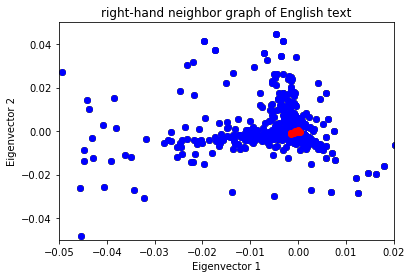

In [14]:
myAx.axis([-.05, .02, -.05, .05])
       
fig        

We can see that the most frequent neighbors of a same/similar category are close to each other on the graph. And note that even we take more words from function words (35) then verbs(~25), the most frequent neightbors of the function words are more clustered than that of the verbs. The reason could be that the English grammtical rule of the functional words are 'stricter', meaning that the parts of speech that could appear after a function words are more limited than that of a verb.

4 Examine the bigram on Mandarin

Similar to Goldsmith's paper, both the left-hand neighbors, meaning that the word and the words before it, and the right-hand neighbors would be examed seperately into two bigram matrices and lately plotted into two graphs.

We take a random Mandarin text and perform the same algorithm. First use a Mandarin tokenization package to tokenize all the words and strip the punctuactions.

In [15]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import string
import scipy.sparse as sparse
import jieba

filename2 = '沉默之门3.txt'
daidengtext = open(filename2,'r',encoding='utf-8')
daidengtext = daidengtext.read()
daidengtest = daidengtext.strip()
seg_list = jieba.cut(daidengtext, cut_all=False)

punct = set(u'''%:!),.:;?]}¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒
﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠
々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻
︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')

textlist=list(seg_list)
textc=[]
for i in textlist:
        textc.append(i)
        if i in punct:
            textc.remove(i)
cWords = sorted(list(set(textc)))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Cldn\AppData\Local\Temp\jieba.cache
Loading model cost 4.842 seconds.
Prefix dict has been built succesfully.


Unlike English text, Mandarin isn't discussed in Goldsmith's paper. It also has a relatively free word order. So below I consider both the bigram graphs of both right-hand neighbor and left-hand neighbor and compare their perfromance.

First we derive the bigram of the right neighbors of the words.

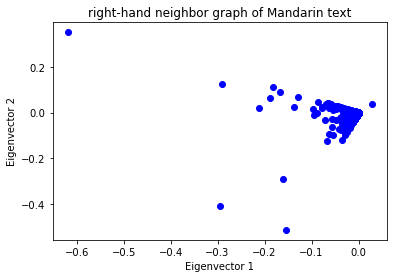

In [16]:
BGMc = np.zeros((len(cWords),len(cWords)))
for n in range(len(textc)-1):
    BGMc[cWords.index(textc[n])][cWords.index(textc[n+1])] =  BGMc[cWords.index(textc[n])][cWords.index(textc[n+1])] + 1

BGMc_cov = np.cov(BGMc.T)
cEvals, cEvecs = la.eigs(BGMc_cov, k=5)
cE1 = cEvecs[:,1]
cE2 = cEvecs[:,2]
   
while cE1[0]<0 or cE2[0]<0:
    cEvals, cEvecs = la.eigs(BGMc_cov, k=5)
    cE1 = cEvecs[:,1]
    cE2 = cEvecs[:,2]
plt.clf()
fig1, myAxc = plt.subplots()
myAxc.plot(np.real(cE1),np.real(cE2),'bo')
plt.title("right-hand neighbor graph of Mandarin text")
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2') 

cE1_sorted=np.argsort(cE1)
cE2_sorted=np.argsort(cE2)

Let's take a quick look of the word distribution. First we examine the word that's on the very top left corner.

In [17]:
print (cWords[cE1_sorted[0]])

的


'的' belongs to the closed class. It's a high frequency word in Mandarin. And it has various use in differnt condition (e.g., possive, particle, etc.). Could be the reason that it's very far away from any other words. Zoom in a little bit to view clearer.

0 的
1 我
2 不
3 是
4 在
5 觉得
6 没
7 李慢
8 人
9 说
10 想
11 有
12 就
13 也
14 可以
15 不是
16 还
17 了
18 知道
19 他
20 已
21 认为
22 你
23 这
24 这儿
25 记得


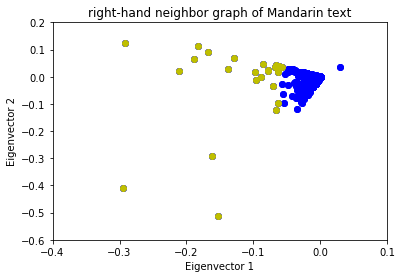

In [18]:
myAxc.plot(np.real(cE1),np.real(cE2),'bo')
v1=[]
v2=[]
for i in range(0,26):
    v1.append(cE1[cE1_sorted[i]])
    v2.append(cE2[cE1_sorted[i]])
    print (i, cWords[cE1_sorted[i]])
myAxc.plot(np.real(v1),np.real(v2),'yo')
myAxc.axis([-.4, .1, -.6, .2])
fig1

There are quite a few function words in the left side of the graph such as '不','没','在'.

Now we derive the bigram of the left-hand neighbors of the words.

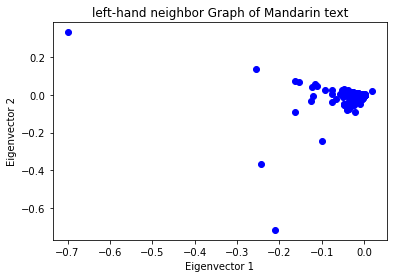

In [19]:
BGMl = np.zeros((len(cWords),len(cWords)))
for n in range(1,len(textc)):
    BGMl[cWords.index(textc[n])][cWords.index(textc[n-1])] =  BGMl[cWords.index(textc[n])][cWords.index(textc[n-1])] + 1

BGMl_cov = np.cov(BGMl.T)
lEvals, lEvecs = la.eigs(BGMl_cov, k=5)
lE1 = lEvecs[:,1]
lE2 = lEvecs[:,2]
   
while lE1[0]<0 or lE2[0]<0:
    lEvals, lEvecs = la.eigs(BGMl_cov, k=5)
    lE1 = lEvecs[:,1]
    lE2 = lEvecs[:,2]
plt.clf()
fig2, myAxl = plt.subplots()
myAxl.plot(np.real(lE1),np.real(lE2),'bo')
plt.title("left-hand neighbor Graph of Mandarin text")
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2') 

lE1_sorted=np.argsort(lE1)
lE2_sorted=np.argsort(lE2)

Note that the left-hand neighbor graph looks roughly the same shape of the right-hand neighbor graph. 
Take ten words that are on the left most, right most, bottom most, up most in the both graphs.

In [20]:
print("R-hand Graph:")
for i in range(10):  #10 words on the left most
    print (cWords[cE1_sorted[i]],end=' ')
print('\n'+'====')
for i in range(1,11): #10 words on the right most
    print (cWords[cE1_sorted[-i]],end=' ')
print('\n'+'====')
for i in range(10): #10 words on the bottom most
    print (cWords[cE2_sorted[i]],end=' ')
print('\n'+'====')
for i in range(1,11): #10 words on the up most
    print (cWords[cE2_sorted[-i]],end=' ')
    
print('\n'+'\n'+"L-hand Graph:")
for i in range(10):  #10 words on the left most
    print (cWords[lE1_sorted[i]],end=' ')
print('\n'+'====')
for i in range(1,11): #10 words on the right most
    print (cWords[lE1_sorted[-i]],end=' ')
print('\n'+'====')
for i in range(10): #10 words on the bottom most
    print (cWords[lE2_sorted[i]],end=' ')
print('\n'+'====')
for i in range(1,11): #10 words on the up most
    print (cWords[lE2_sorted[-i]],end=' ')

R-hand Graph:
的 我 不 是 在 觉得 没 李慢 人 说 
====
  除了 悲痛 一切都在 草原 嗯 钱 这天 长街 同志 
====
人 我 李慢 他 声音 老人 书 你 事 自行车 
====
的 不 觉得 没 想 在 可以 认为 已 这儿 

L-hand Graph:
我 李慢 了 的 也 是 老头 说 自己 你 
====
  艺术 人类 德令哈 空空 戈壁 有点 泪滴 两手空空 生长 
====
的 了 让 是 一个 给 把 今夜 叫 现在 
====
我 李慢 也 老头 他 老人 自己 中 都 就 

We could tell that left-hand neighbor graph performs slightly better than the right-hand neighbor graph. While both of the graphs have the pronouns('我','他','你')and names of people ('李慢','老人') in the corners of the graph, in the left-hand graph the function words are more distinctly separated than those in the right-hand neighbor graph. '的','了','让','是','给','把' are all closed class in Mandarin. And they are all in one corner of the left-hand neightbor graph. 

This is a curious result because in Goldsmith's paper, the right-hand neighbor graph of English text behaves a little better the left-hand graph. Whether this phenomenom is caused by the syntactic rules of closed class, or the underlying head-directionality parameter in two languages could be further discussed and explored. 

Now we want know if there are more similarities in the behavior of words from same categories between English and Mandarin texts.

Locate all the function words in green dots on the sorted first 25 words (in black circle).

0 的
1 了
2 让
3 是
4 一个
5 给
6 把
7 今夜
8 叫
9 现在
10 问
11 如果
12 没
13 那时
14 对
15 在
16 知道
17 倪
18 跟
19 到
20 但
21 吧
22 起来
23 好像
24 什么


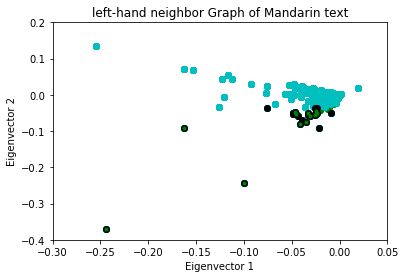

In [28]:
myAxl.plot(np.real(lE1),np.real(lE2),'co')
v3=[]
v4=[]
for i in range(25):
    v3.append(lE1[lE2_sorted[i]])
    v4.append(lE2[lE2_sorted[i]])
    print (i, cWords[lE2_sorted[i]])
myAxl.plot(np.real(v3),np.real(v4),'ko')

fig2
v3=[]
v4=[]
clo=[0,1,2,3,5,6,8,12,14,15,18,19,20,21]#indices of words belong to closed class
for i in clo:
    v3.append(lE1[lE2_sorted[i]])
    v4.append(lE2[lE2_sorted[i]])
myAxl.plot(np.real(v3),np.real(v4),'g.')
myAxl.axis([-.3, .05, -.4, .2])
fig2

While these are all function words, in Mandarin functions words behave unlike those of English. And often times they serve different functions in different situations. Therefore it's hard to observe a trend line in the graph.

But maybe we can see the trend line in pronouns. 
Same as the first part, locate the pronouns '我','他','你' on the graph.

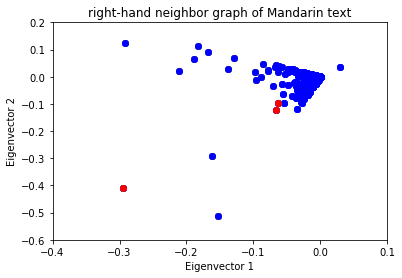

In [22]:
myAxc.plot(np.real(cE1),np.real(cE2),'bo')
cpro=[1,19,22] # sorted indices for pronouns in R-hand graph
for i in cpro:
    myAxc.plot(np.real(v1[i]),np.real(v2[i]),'ro')
fig1

It's somewhat linear but not very clear.

Now we want to check what kind of words appear after a same category and where the most frequent neighbors of words in this category locate.

Same as before, take the words in the closed class, sum up their representitive columns in the bigram into an array, and then pick out 200 entries in the array that have the largest value. These will be the most frequenct words that occur after the closed class in Mandarin.

的 了 让 是 给 把 叫 没 对 在 跟 到 但 吧 

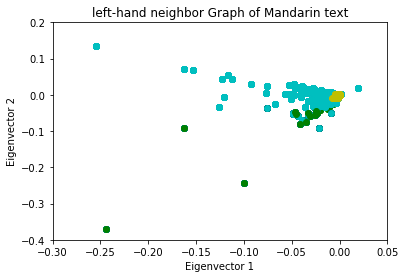

In [29]:
myAxl.plot(np.real(lE1),np.real(lE2),'co')

Mc=np.zeros(len(cWords))
for i in clo: 
    print (cWords[lE2_sorted[i]],end=' ')
    for x in range(len(cWords)):
        Mc[x]=Mc[x]+BGMl[lE2_sorted[i]][x]

Mc_sorted=np.argsort(Mc)
v5=[]
v6=[]
for x in range(200):
    v5.append(lE1[Mc_sorted[x]])
    v6.append(lE2[Mc_sorted[x]])


myAxl.plot(np.real(v3),np.real(v4),'go')
myAxl.plot(np.real(v5),np.real(v6),'yo')
fig2

Although the closed class behaves differently in Mandarin, the high frequent words are still clustered together, even they are not as close to each other as those of the function words in English. 

Take the words on the graph where most of them are pronouns and names of people, which will be the top 10 words on right-hand neighbor Graph, sum up their representitive columns in the bigram into an array, and then pick out 200 entries in the array that have the largest value. These will be the most frequenct words that occur after the pronouns and names of people. Zoom in.

人 我 李慢 他 声音 老人 书 你 事 自行车 

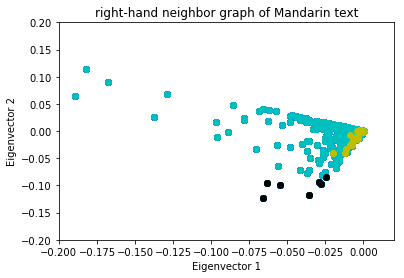

In [30]:
myAxc.plot(np.real(cE1),np.real(cE2),'co')
v1=[]
v2=[]
Mc=np.zeros(len(cWords))
for i in range(10): #10 words on the bottom most
    print (cWords[cE2_sorted[i]],end=' ')
    v1.append(cE1[cE2_sorted[i]])
    v2.append(cE2[cE2_sorted[i]])
    for x in range(len(cWords)):
        Mc[x]=Mc[x]+BGMc[cE2_sorted[i]][x]

Mc_sorted=np.argsort(Mc)
v3=[]
v4=[]
for x in range(200):
    v3.append(cE1[Mc_sorted[x]])
    v4.append(cE2[Mc_sorted[x]])

myAxc.plot(np.real(v1),np.real(v2),'ko')
myAxc.plot(np.real(v3),np.real(v4),'yo')
myAxc.axis([-.2, .02, -.2, .2])
fig1


The more frequent words after pronouns and names are close, but not so clustered as expected.


5 Conclusion

It is intriguing that the words from same syntactic categories are very close to each other in both languages, proving that eigenvectors of the nearest neighbor bigram indeed could reflect the syntactic properties of the words. English text performs better than the Mandarin text, which is natural because English syntax is more demanding in word ordering. Therefore examining the nearest neighbor is relatively reliable to determine the syntactic category of the words for English.

To improve this statistical method, word frequency could be one other factor to be used to further normalize or center the graph in the future. Although this method is not strong enough to completely and accurately derive the parts of speech of the words, it does show some evidence of the universal properties of specific classes of languages.

Reference:
Mikhail Belkin, John Goldsmith. 2002. *Using eigenvectors of the bigram graph to infer morpheme identity* https://arxiv.org/abs/cs/0207002v1